## Trying to interpret singular vectors

In [1]:
%run ../imports.py

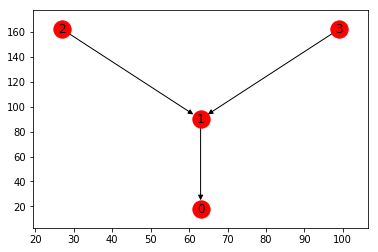

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (2,1),
    (3,1)
])
N = nx.number_of_nodes(G)
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [4]:
L

matrix([[ 0,  0,  0,  0],
        [-1,  1,  0,  0],
        [ 0, -1,  1,  0],
        [ 0, -1,  0,  1]], dtype=int64)

### Symmetrization

In [5]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [6]:
Q

matrix([[-2.88675135e-01,  8.66025404e-01, -2.88675135e-01,
         -2.88675135e-01],
        [-8.16496581e-01,  5.55111512e-17,  4.08248290e-01,
          4.08248290e-01],
        [-1.38777878e-17, -1.38777878e-17, -7.07106781e-01,
          7.07106781e-01]])

In [7]:
np.matmul(Q, np.array([1,1,1,1]))

matrix([[0.00000000e+00, 5.55111512e-17, 1.11022302e-16]])

In [8]:
np.matmul(Q, Q.T)

matrix([[ 1.00000000e+00,  1.44160742e-16, -2.94507387e-17],
        [ 1.44160742e-16,  1.00000000e+00,  3.70692371e-17],
        [-2.94507387e-17,  3.70692371e-17,  1.00000000e+00]])

In [9]:
np.matmul(Q.T, Q)

matrix([[ 0.75, -0.25, -0.25, -0.25],
        [-0.25,  0.75, -0.25, -0.25],
        [-0.25, -0.25,  0.75, -0.25],
        [-0.25, -0.25, -0.25,  0.75]])

Create undirected graph from the equivalent Laplacian

In [10]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [11]:
print(eqL)

[[ 5.00000000e-01 -5.00000000e-01  5.63684477e-16 -2.63744228e-16]
 [-5.00000000e-01  1.16666667e+00 -3.33333333e-01 -3.33333333e-01]
 [ 4.28544112e-17 -3.33333333e-01  6.66666667e-01 -3.33333333e-01]
 [ 5.44294620e-17 -3.33333333e-01 -3.33333333e-01  6.66666667e-01]]


In [12]:
np.linalg.matrix_rank(eqL)

3

In [13]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


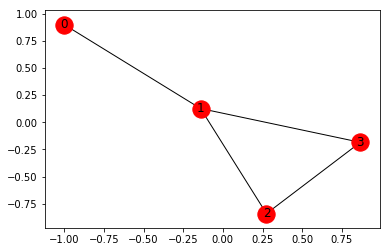

In [14]:
nx.draw_networkx(negG)

In [15]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

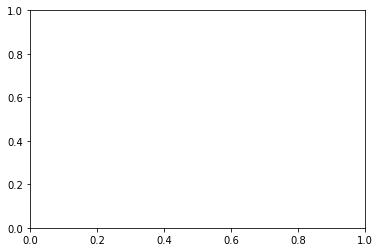

In [16]:
nx.draw_networkx(posG)

In [17]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [18]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [19]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-9.06493304e-17, -1.00000000e+00, -1.00000000e+00]),
 matrix([[-0.57735027, -0.4428697 , -0.67178653],
         [-0.57735027,  0.81548857, -0.06601113],
         [-0.57735027, -0.37261887,  0.73779766]]))

In [20]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.66666667,  0.33333333,  0.33333333],
        [ 0.33333333, -0.66666667,  0.33333333],
        [ 0.33333333,  0.33333333, -0.66666667]])

In [21]:
L

matrix([[ 0,  0,  0,  0],
        [-1,  1,  0,  0],
        [ 0, -1,  1,  0],
        [ 0, -1,  0,  1]], dtype=int64)